In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cab_data = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer_id = pd.read_csv('Customer_ID.csv')
transaction_id = pd.read_csv('Transaction_ID.csv')

#Understanding the structure of the datasets

In [3]:
cab_data.info()
cab_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284847 entries, 0 to 284846
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  284847 non-null  int64  
 1   Date of Travel  284847 non-null  int64  
 2   Company         284846 non-null  object 
 3   City            284846 non-null  object 
 4   KM Travelled    284846 non-null  float64
 5   Price Charged   284846 non-null  float64
 6   Cost of Trip    284846 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 15.2+ MB


,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,2.848470e+05,284847.000000,284846.000000,284846.000000,284846.000000
mean,1.017515e+07,42855.331336,22.581920,431.674874,286.593354
std,1.004262e+05,259.801074,12.229313,280.959638,158.015598
min,1.000001e+07,432.000000,1.900000,15.600000,19.000000
25%,1.008849e+07,42652.000000,12.000000,209.850000,151.588800
50%,1.017536e+07,42874.000000,22.470000,392.510000,282.800000
75%,1.026168e+07,43058.000000,32.980000,594.920000,414.200000
max,1.035012e+07,43298.000000,48.000000,2048.030000,691.200000


In [4]:
city.info()
city.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [5]:
customer_id.info()
customer_id.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [6]:
transaction_id.info()
transaction_id.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


# Checking for missing data

In [7]:
missing_values = {
    "Cab Data": cab_data.isnull().sum(),
    "City Data": city.isnull().sum(),
    "Customer Data": customer_id.isnull().sum(),
    "Transaction Data": transaction_id.isnull().sum()
}

missing_values

{'Cab Data': Transaction ID    0
 Date of Travel    0
 Company           1
 City              1
 KM Travelled      1
 Price Charged     1
 Cost of Trip      1
 dtype: int64,
 'City Data': City          0
 Population    0
 Users         0
 dtype: int64,
 'Customer Data': Customer ID           0
 Gender                0
 Age                   0
 Income (USD/Month)    0
 dtype: int64,
 'Transaction Data': Transaction ID    0
 Customer ID       0
 Payment_Mode      0
 dtype: int64}

**NOTE**: From our investigation with the datasets, there are no missing values.

# Checking for duplicates

In [8]:
duplicates = {
    "Cab Data": cab_data.duplicated().sum(),
    "City Data": city.duplicated().sum(),
    "Customer Data": customer_id.duplicated().sum(),
    "Transaction Data": transaction_id.duplicated().sum()
}

duplicates

{'Cab Data': np.int64(0),
 'City Data': np.int64(0),
 'Customer Data': np.int64(0),
 'Transaction Data': np.int64(0)}

**NOTE:** There are no duplicates.

# Data Transformation

In [9]:
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], origin = "1899-12-30", unit = "D")
city['Population'] = city['Population'].str.replace(',','').astype(int)
city['Users'] = city['Users'].str.replace(',','').astype(int)

In [10]:
print(cab_data['Date of Travel'])

0        2016-01-08
1        2016-01-06
2        2016-01-02
3        2016-01-07
4        2016-01-03
            ...    
284842   2018-07-10
284843   2018-07-12
284844   2018-07-15
284845   2018-07-16
284846   1901-03-07
Name: Date of Travel, Length: 284847, dtype: datetime64[ns]


In [11]:
print(city['Population'])

0     8405837
1     1955130
2     1595037
3     1339155
4     1177609
5     1030185
6      959307
7      943999
8      942908
9      814885
10     754233
11     698371
12     671238
13     631442
14     629591
15     545776
16     542085
17     418859
18     327225
19     248968
Name: Population, dtype: int64


In [12]:
print(city['Users'])

0     302149
1     164468
2     144132
3      17675
4      27247
5      12994
6      69995
7       6133
8      22157
9      24701
10     12421
11     14978
12     25063
13      5712
14    213609
15      7044
16      3643
17    127001
18      9270
19     80021
Name: Users, dtype: int64


# Relationships

In [13]:
relationships = {
    "Cab Data & Transaction Data": cab_data["Transaction ID"].isin(transaction_id["Transaction ID"]).sum(),
    "Transaction Data & Customer Data": transaction_id["Customer ID"].isin(customer_id["Customer ID"]).sum(),
    "Cab Data & City Data": cab_data["City"].isin(city["City"]).sum()
}

relationships

{'Cab Data & Transaction Data': np.int64(284847),
 'Transaction Data & Customer Data': np.int64(440098),
 'Cab Data & City Data': np.int64(284846)}

**NOTE:**
- Cab_Data links to Transaction_ID.csv via Transaction ID.
- Transaction_ID.csv links to Customer_ID.csv via Customer ID.
- Cab_Data.csv links to City.csv via City to analyze market penetration

# Outliers

In [14]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

outliers = {
    "KM Travelled": detect_outliers_iqr(cab_data, "KM Travelled"),
    "Price Charged": detect_outliers_iqr(cab_data, "Price Charged"),
    "Cost of Trip": detect_outliers_iqr(cab_data, "Cost of Trip"),
    "Income (USD/Month)": detect_outliers_iqr(customer_id, "Income (USD/Month)")
}

outliers




{'KM Travelled': Series([], Name: KM Travelled, dtype: float64),
 'Price Charged': 233       1341.17
 234       1412.06
 237       1540.61
 240       1239.72
 247       1430.64
            ...   
 284590    1340.74
 284609    1284.30
 284618    1257.69
 284638    1240.83
 284659    1404.78
 Name: Price Charged, Length: 4945, dtype: float64,
 'Cost of Trip': Series([], Name: Cost of Trip, dtype: float64),
 'Income (USD/Month)': Series([], Name: Income (USD/Month), dtype: int64)}

**NOTE:**
- Only "Price Charged" has lots of outliers, 5958 outliers that are outside of the expected range.
- The rest of the numerical data are within the expected range.

# Merging

In [15]:
cab_transaction_data = cab_data.merge(transaction_id, on="Transaction ID", how="left")

cab_customer_data = cab_transaction_data.merge(customer_id, on="Customer ID", how="left")

cab_merged = cab_customer_data.merge(city, on="City", how="left")

cab_merged.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885.0,24701.0
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885.0,24701.0
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885.0,24701.0
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885.0,24701.0
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885.0,24701.0


In [16]:
cab_merged

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885.0,24701.0
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885.0,24701.0
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885.0,24701.0
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885.0,24701.0
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885.0,24701.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284842,10350116,2018-07-10,Yellow Cab,TUCSON AZ,2.10,30.03,28.476,39807,Cash,Male,37,17371,631442.0,5712.0
284843,10350117,2018-07-12,Yellow Cab,TUCSON AZ,5.70,83.82,73.872,41350,Card,Male,33,11768,631442.0,5712.0
284844,10350118,2018-07-15,Yellow Cab,WASHINGTON DC,38.40,523.03,460.800,52719,Cash,Female,35,28047,418859.0,127001.0
284845,10350119,2018-07-16,Yellow Cab,WASHINGTON DC,39.10,575.60,553.656,53522,Cash,Female,35,18967,418859.0,127001.0


# Hypothesis and Testing

**Investigation:**  
- Which company has more profit and is more popular?
- What is the profit per ride of each company (the potential of the company)?

<ipython-input-17-f8631c77d750>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Company", y = "Profit", data = profit_summary, palette = {"Yellow Cab": "yellow", "Pink Cab": "pink"})


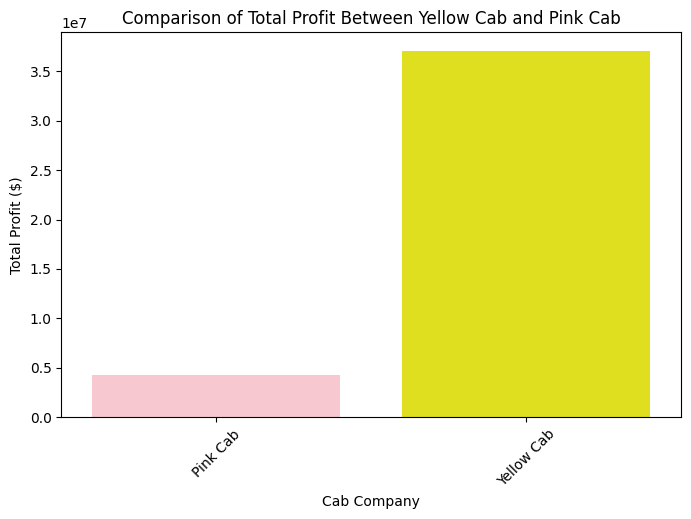

In [17]:
# Profit Calculation
cab_merged["Profit"] = cab_merged["Price Charged"] - cab_merged["Cost of Trip"]

# Aggregated Profit Analysis by Company
profit_summary = cab_merged.groupby("Company")["Profit"].sum().reset_index()

# Plot Profit Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x = "Company", y = "Profit", data = profit_summary, palette = {"Yellow Cab": "yellow", "Pink Cab": "pink"})
plt.title("Comparison of Total Profit Between Yellow Cab and Pink Cab")
plt.xlabel("Cab Company")
plt.ylabel("Total Profit ($)")
plt.xticks(rotation=45)
plt.show()

In [18]:
print(profit_summary)
print(profit_summary["Profit"][1] / profit_summary["Profit"][0])

      Company        Profit
0    Pink Cab  4.248403e+06
1  Yellow Cab  3.707749e+07
8.727393461795186


The result shows that Yellow Cab company is way more profitable when compared to Pink Cab, about 8 times more profitable.

<ipython-input-19-3edabba87a8d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Company", y = "Total Rides", data = ride_counts, palette = {"Yellow Cab": "yellow", "Pink Cab": "pink"})


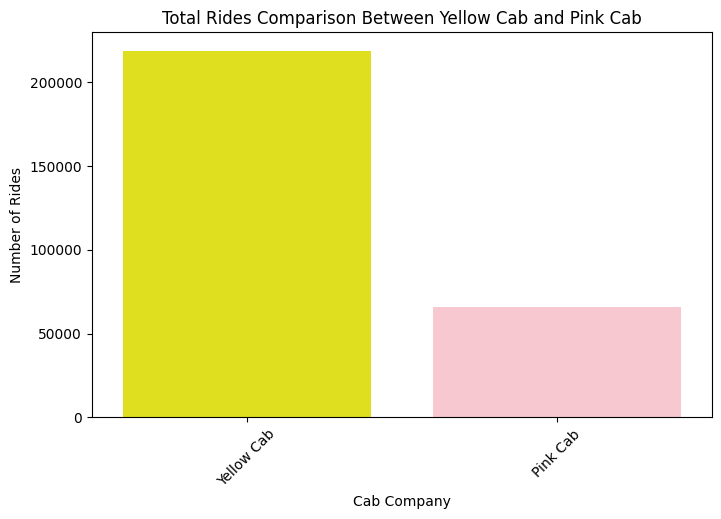

In [19]:
# Count number of rides per company
ride_counts = cab_merged["Company"].value_counts().reset_index()
ride_counts.columns = ["Company", "Total Rides"]

# Plot ride count comparison
plt.figure(figsize=(8, 5))
sns.barplot(x = "Company", y = "Total Rides", data = ride_counts, palette = {"Yellow Cab": "yellow", "Pink Cab": "pink"})
plt.title("Total Rides Comparison Between Yellow Cab and Pink Cab")
plt.xlabel("Cab Company")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()

In [20]:
print(ride_counts)
print(ride_counts["Total Rides"][0] / ride_counts["Total Rides"][1])

      Company  Total Rides
0  Yellow Cab       218925
1    Pink Cab        65921
3.3210206155853217


The fact that Yellow Cab is more profitable is because of its being more popular than Pink Cab, as people are 3 times more frequent to take Yellow Cab than Pink Cab.

In [21]:
# Display profit per ride
profit_per_ride = profit_summary.merge(ride_counts, on="Company")
profit_per_ride["Profit Per Ride"] = profit_per_ride["Profit"] / profit_per_ride["Total Rides"]

print(profit_per_ride)

      Company        Profit  Total Rides  Profit Per Ride
0    Pink Cab  4.248403e+06        65921        64.446888
1  Yellow Cab  3.707749e+07       218925       169.361596


This also resulted in the profit per ride of Yellow Cab almost 3 times as high as Pink Cab.

# Observation

**NOTE:** Because our result shows that Yellow Cab is more profitable than Pink Cab, we have to find out why so that the XYZ company can feel comfortable entering the Cab market and potentially invest in the Yellow Cab, as it is currently the most profiting company in the market.

**Hypothesis:** What factors influence that difference in profit between Yellow Cab and Pink Cab?
- Customer Reach
- Customer Retention Rate
- Seasonality
- Customer characteristics
  - Age
  - Income


# Customer Reach
- Does Yellow Cab operates in more cities compared to Pink Cab?
- How dominate is Yellow Cab?

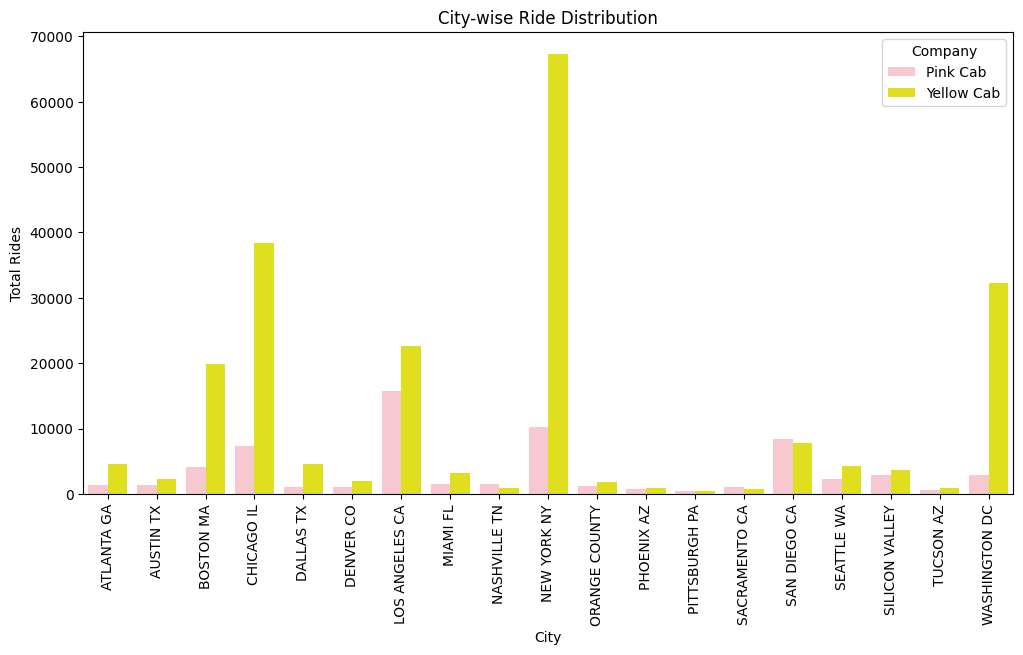

In [22]:
# City-wise ride distribution
city_rides = cab_merged.groupby(["City", "Company"])["Transaction ID"].count().reset_index()
city_rides.columns = ["City", "Company", "Total Rides"]

# Plot city-wise ride distribution
plt.figure(figsize=(12, 6))
sns.barplot(x = "City", y = "Total Rides", hue = "Company", data = city_rides,  palette = {"Yellow Cab": "yellow", "Pink Cab": "pink"})
plt.xticks(rotation=90)
plt.title("City-wise Ride Distribution")
plt.xlabel("City")
plt.ylabel("Total Rides")
plt.legend(title="Company")
plt.show()

**Evaluation:**
- Though both firms are present in most cities in the dataset, Yellow Cab company dominates most of the city in the total number of rides, especially busy cities like Boston, Chicago, New York and Washington DC.
- This means that Yellow Cab does a better job at bringing in customers to use their services than Pink Cab.

# Customer Retention Rate
Which company has more returning customers/loyal customers?

<ipython-input-23-e3ff321f2241>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Company", y = "Customers with 5+ Rides", data = retention_summary, palette = {"Yellow Cab": "yellow", "Pink Cab": "pink"})


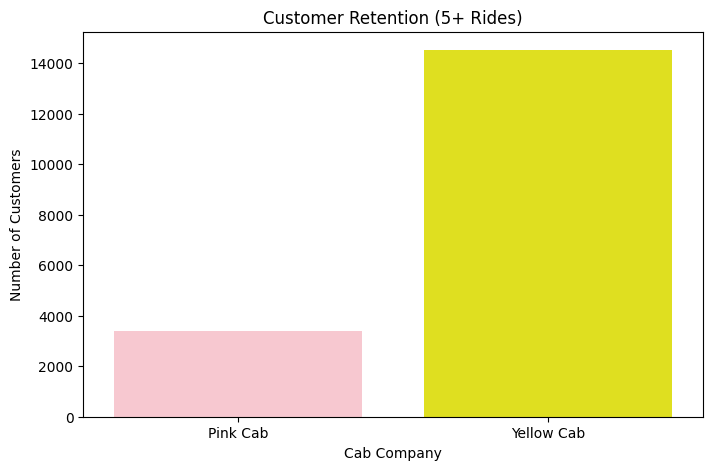

<ipython-input-23-e3ff321f2241>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Company", y = "Customers with 10+ Rides", data = retention_summary, palette = {"Yellow Cab": "yellow", "Pink Cab": "pink"})


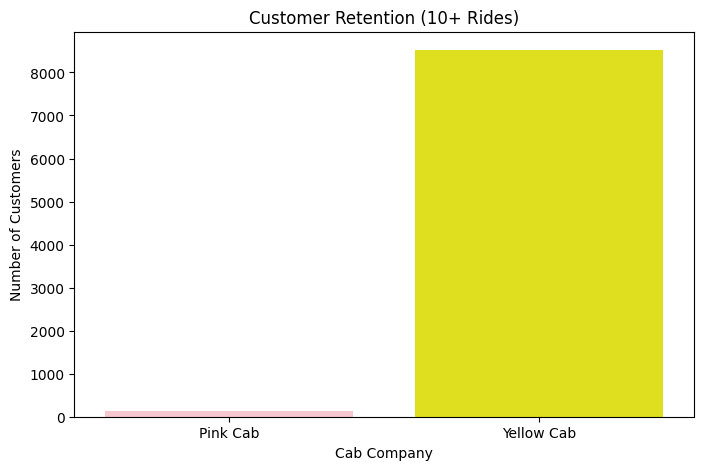

In [23]:
# Customer retention analysis
customer_ride_counts = cab_merged.groupby(["Customer ID", "Company"])["Transaction ID"].count().reset_index()
customer_ride_counts.columns = ["Customer ID", "Company", "Ride Count"]

# Segmentation: Customers who took at least 5 and 10 rides with the same company
retention_summary = customer_ride_counts.groupby("Company")["Ride Count"].apply(lambda x: (x >= 5).sum()).reset_index()
retention_summary.columns = ["Company", "Customers with 5+ Rides"]

retention_summary_10 = customer_ride_counts.groupby("Company")["Ride Count"].apply(lambda x: (x >= 10).sum()).reset_index()
retention_summary_10.columns = ["Company", "Customers with 10+ Rides"]

# Merge both retention summaries
retention_summary = retention_summary.merge(retention_summary_10, on="Company")

# Plot customer retention comparison
plt.figure(figsize=(8, 5))
sns.barplot(x = "Company", y = "Customers with 5+ Rides", data = retention_summary, palette = {"Yellow Cab": "yellow", "Pink Cab": "pink"})
plt.title("Customer Retention (5+ Rides)")
plt.xlabel("Cab Company")
plt.ylabel("Number of Customers")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x = "Company", y = "Customers with 10+ Rides", data = retention_summary, palette = {"Yellow Cab": "yellow", "Pink Cab": "pink"})
plt.title("Customer Retention (10+ Rides)")
plt.xlabel("Cab Company")
plt.ylabel("Number of Customers")
plt.show()

In [24]:
print(retention_summary)

      Company  Customers with 5+ Rides  Customers with 10+ Rides
0    Pink Cab                     3404                       133
1  Yellow Cab                    14512                      8520


**Evaluation:**
- Yellow Cab is better at retaining customers compared to Pink Cab.
- The number of customers who have had 5 or more rides with Yellow Cabs (15780) is 3 times the number of the same type of customers for Pink Cab (5515).
- The number of customers who have had 10 or more rides with Yellow Cab is still above the 10 thousand customers, while Pink Cab's count has already dropped bellow 500 customers.

# Seasonality
How is the trend of cab rides at each company differs depending on time periods?

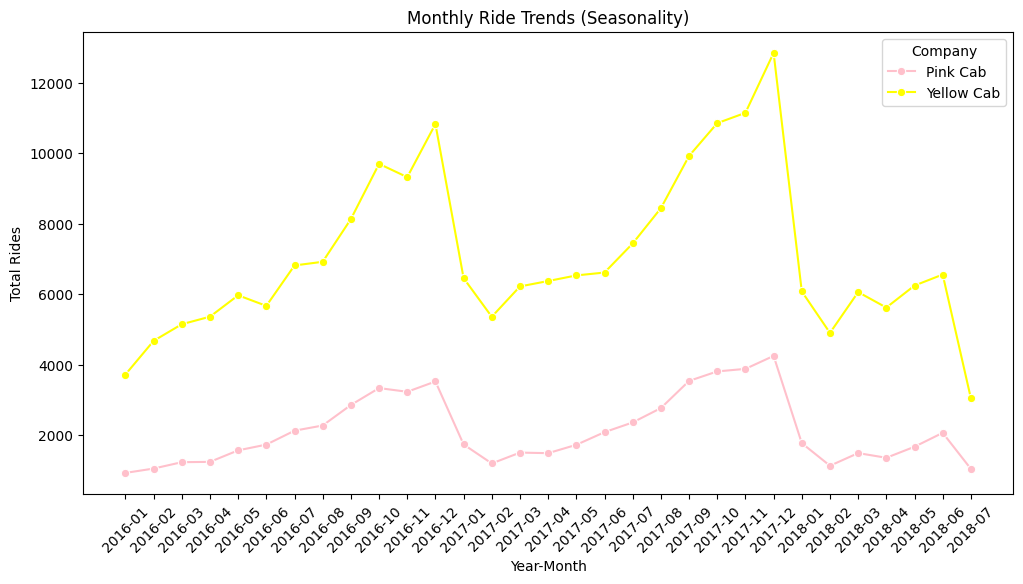

In [25]:
cab_merged["YearMonth"] = cab_merged["Date of Travel"].dt.to_period("M")

# Convert 'YearMonth' to string format for plotting
cab_merged["YearMonth"] = cab_merged["YearMonth"].astype(str)

# Monthly trend of rides
monthly_rides = cab_merged.groupby(["YearMonth", "Company"])["Transaction ID"].count().reset_index()
monthly_rides.columns = ["YearMonth", "Company", "Total Rides"]

# Plot monthly ride trends
plt.figure(figsize=(12, 6))
sns.lineplot(x = "YearMonth", y = "Total Rides", hue = "Company", data = monthly_rides, marker = "o", palette = {"Yellow Cab": "yellow", "Pink Cab": "pink"})
plt.xticks(rotation=45)
plt.title("Monthly Ride Trends (Seasonality)")
plt.xlabel("Year-Month")
plt.ylabel("Total Rides")
plt.legend(title="Company")
plt.show()

**Evaluation:**
- Both companies have the same patterns - peaks at the end of each year and dips at the beginning of each years.
- However, Yellow Cab has a higher overall rides at every time periods when compared to Pink Cab.
- In conclusion, there are seasonality in the trend of rides that equally impacts both company, but overall, Yellow Cab is better at keeping their count of customers higher than Pink Cab.

# Customer Characteristics
**AGE**

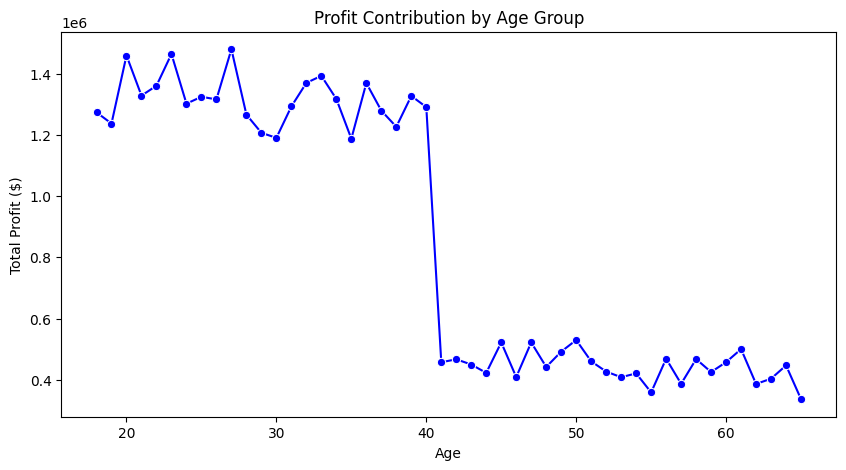

In [26]:

# Age-wise profit distribution
age_profit = cab_merged.groupby("Age")["Profit"].sum().reset_index()

# Plot age-wise profit distribution
plt.figure(figsize=(10, 5))
sns.lineplot(x="Age", y="Profit", data=age_profit, marker="o", color="blue")
plt.title("Profit Contribution by Age Group")
plt.xlabel("Age")
plt.ylabel("Total Profit ($)")
plt.show()

**Evaluation:**
- It seems like customers in the age group 18-40 contribute most to the profit of both firms.
- It is possible that Yellow Cab does a better at appealing to this age group compared to Pink Cab (advertisement, deals, price), resulting in being more profitable.

**INCOME**

<ipython-input-27-13c5eaf1df8a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_distribution = cab_merged.groupby(pd.cut(cab_merged["Income (USD/Month)"], bins=[0, 5000, 10000, 20000, 50000], labels=["Low", "Mid", "Upper-Mid", "High"]))["Customer ID"].count().reset_index()
<ipython-input-27-13c5eaf1df8a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Income Group", y="Customer Count", data=income_distribution, palette="magma")


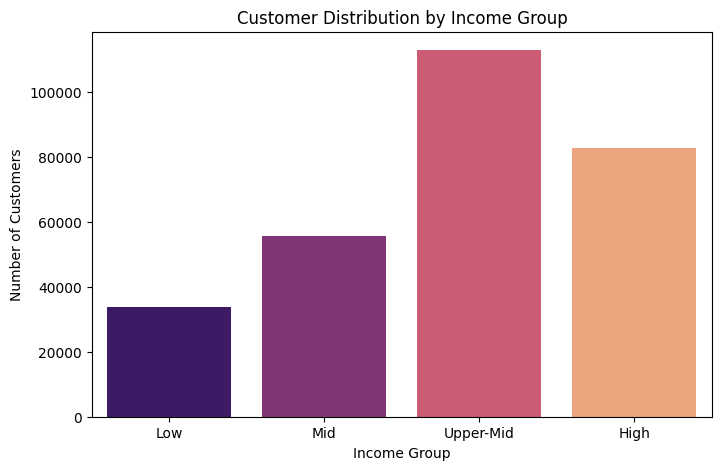

In [27]:
# Income-wise distribution of customers
income_distribution = cab_merged.groupby(pd.cut(cab_merged["Income (USD/Month)"], bins=[0, 5000, 10000, 20000, 50000], labels=["Low", "Mid", "Upper-Mid", "High"]))["Customer ID"].count().reset_index()
income_distribution.columns = ["Income Group", "Customer Count"]

# Plot income group distribution
plt.figure(figsize=(8, 5))
sns.barplot(x="Income Group", y="Customer Count", data=income_distribution, palette="magma")
plt.title("Customer Distribution by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Number of Customers")
plt.show()

**Evaluation:**
- Customers in upper-mid class income contribute most to the profit of both firms.
- Similarly, it is possible that Yellow Cab's business strategy does a better job at appealing to this income group compared to Pink Cab.

**OVERALL**

In [28]:
age_bins = [18, 40, 60, 100]
age_labels = ["18-40", "40-60", "60+"]
cab_merged["Age Group"] = pd.cut(cab_merged["Age"], bins=age_bins, labels=age_labels, right=False)

income_bins = [0, 5000, 10000, 20000, 50000]
income_labels = ["Low", "Mid", "Upper-Mid", "High"]
cab_merged["Income Group"] = pd.cut(cab_merged["Income (USD/Month)"], bins=income_bins, labels=income_labels, right=False)

stratified_analysis = cab_merged.groupby(["Company", "Age Group", "Income Group"]).agg(
    total_rides=("Transaction ID", "count")
).reset_index()

print(stratified_analysis)

<ipython-input-28-f2c1824d9daf>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stratified_analysis = cab_merged.groupby(["Company", "Age Group", "Income Group"]).agg(


       Company Age Group Income Group  total_rides
0     Pink Cab     18-40          Low         5613
1     Pink Cab     18-40          Mid         8956
2     Pink Cab     18-40    Upper-Mid        18188
3     Pink Cab     18-40         High        13400
4     Pink Cab     40-60          Low         1685
5     Pink Cab     40-60          Mid         3090
6     Pink Cab     40-60    Upper-Mid         6035
7     Pink Cab     40-60         High         4689
8     Pink Cab       60+          Low          534
9     Pink Cab       60+          Mid          812
10    Pink Cab       60+    Upper-Mid         1698
11    Pink Cab       60+         High         1221
12  Yellow Cab     18-40          Low        18354
13  Yellow Cab     18-40          Mid        29792
14  Yellow Cab     18-40    Upper-Mid        60964
15  Yellow Cab     18-40         High        44058
16  Yellow Cab     40-60          Low         5672
17  Yellow Cab     40-60          Mid        10261
18  Yellow Cab     40-60    Upp

If we look at the age group 18-40 and income group Upper-Mid of each company, Yellow Cab is doing much better at attracting customers than Pink Cab (60964 vs 18188)

# Recommendation
Based on the performance of both firms' customers base and financial performance, Yellow Cab is the better investment choice for our XYZ company. Yellow Cab has higher profit, a better customer retention rate and a stronger long-term growth potential than Pink Cab.